In [1]:
#Import necessary packages and the collected data

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm
import itertools
import math


collected_full = pd.read_csv("/Users/DrQ/Documents/Doezema Research/data/CollectedData.csv")

In [2]:
#Cut off unnecessary columns and change date column to datetime datatype

collected_full = collected_full.drop(collected_full.index[2513:])
collected_full['date'] = pd.to_datetime(collected_full['date'])

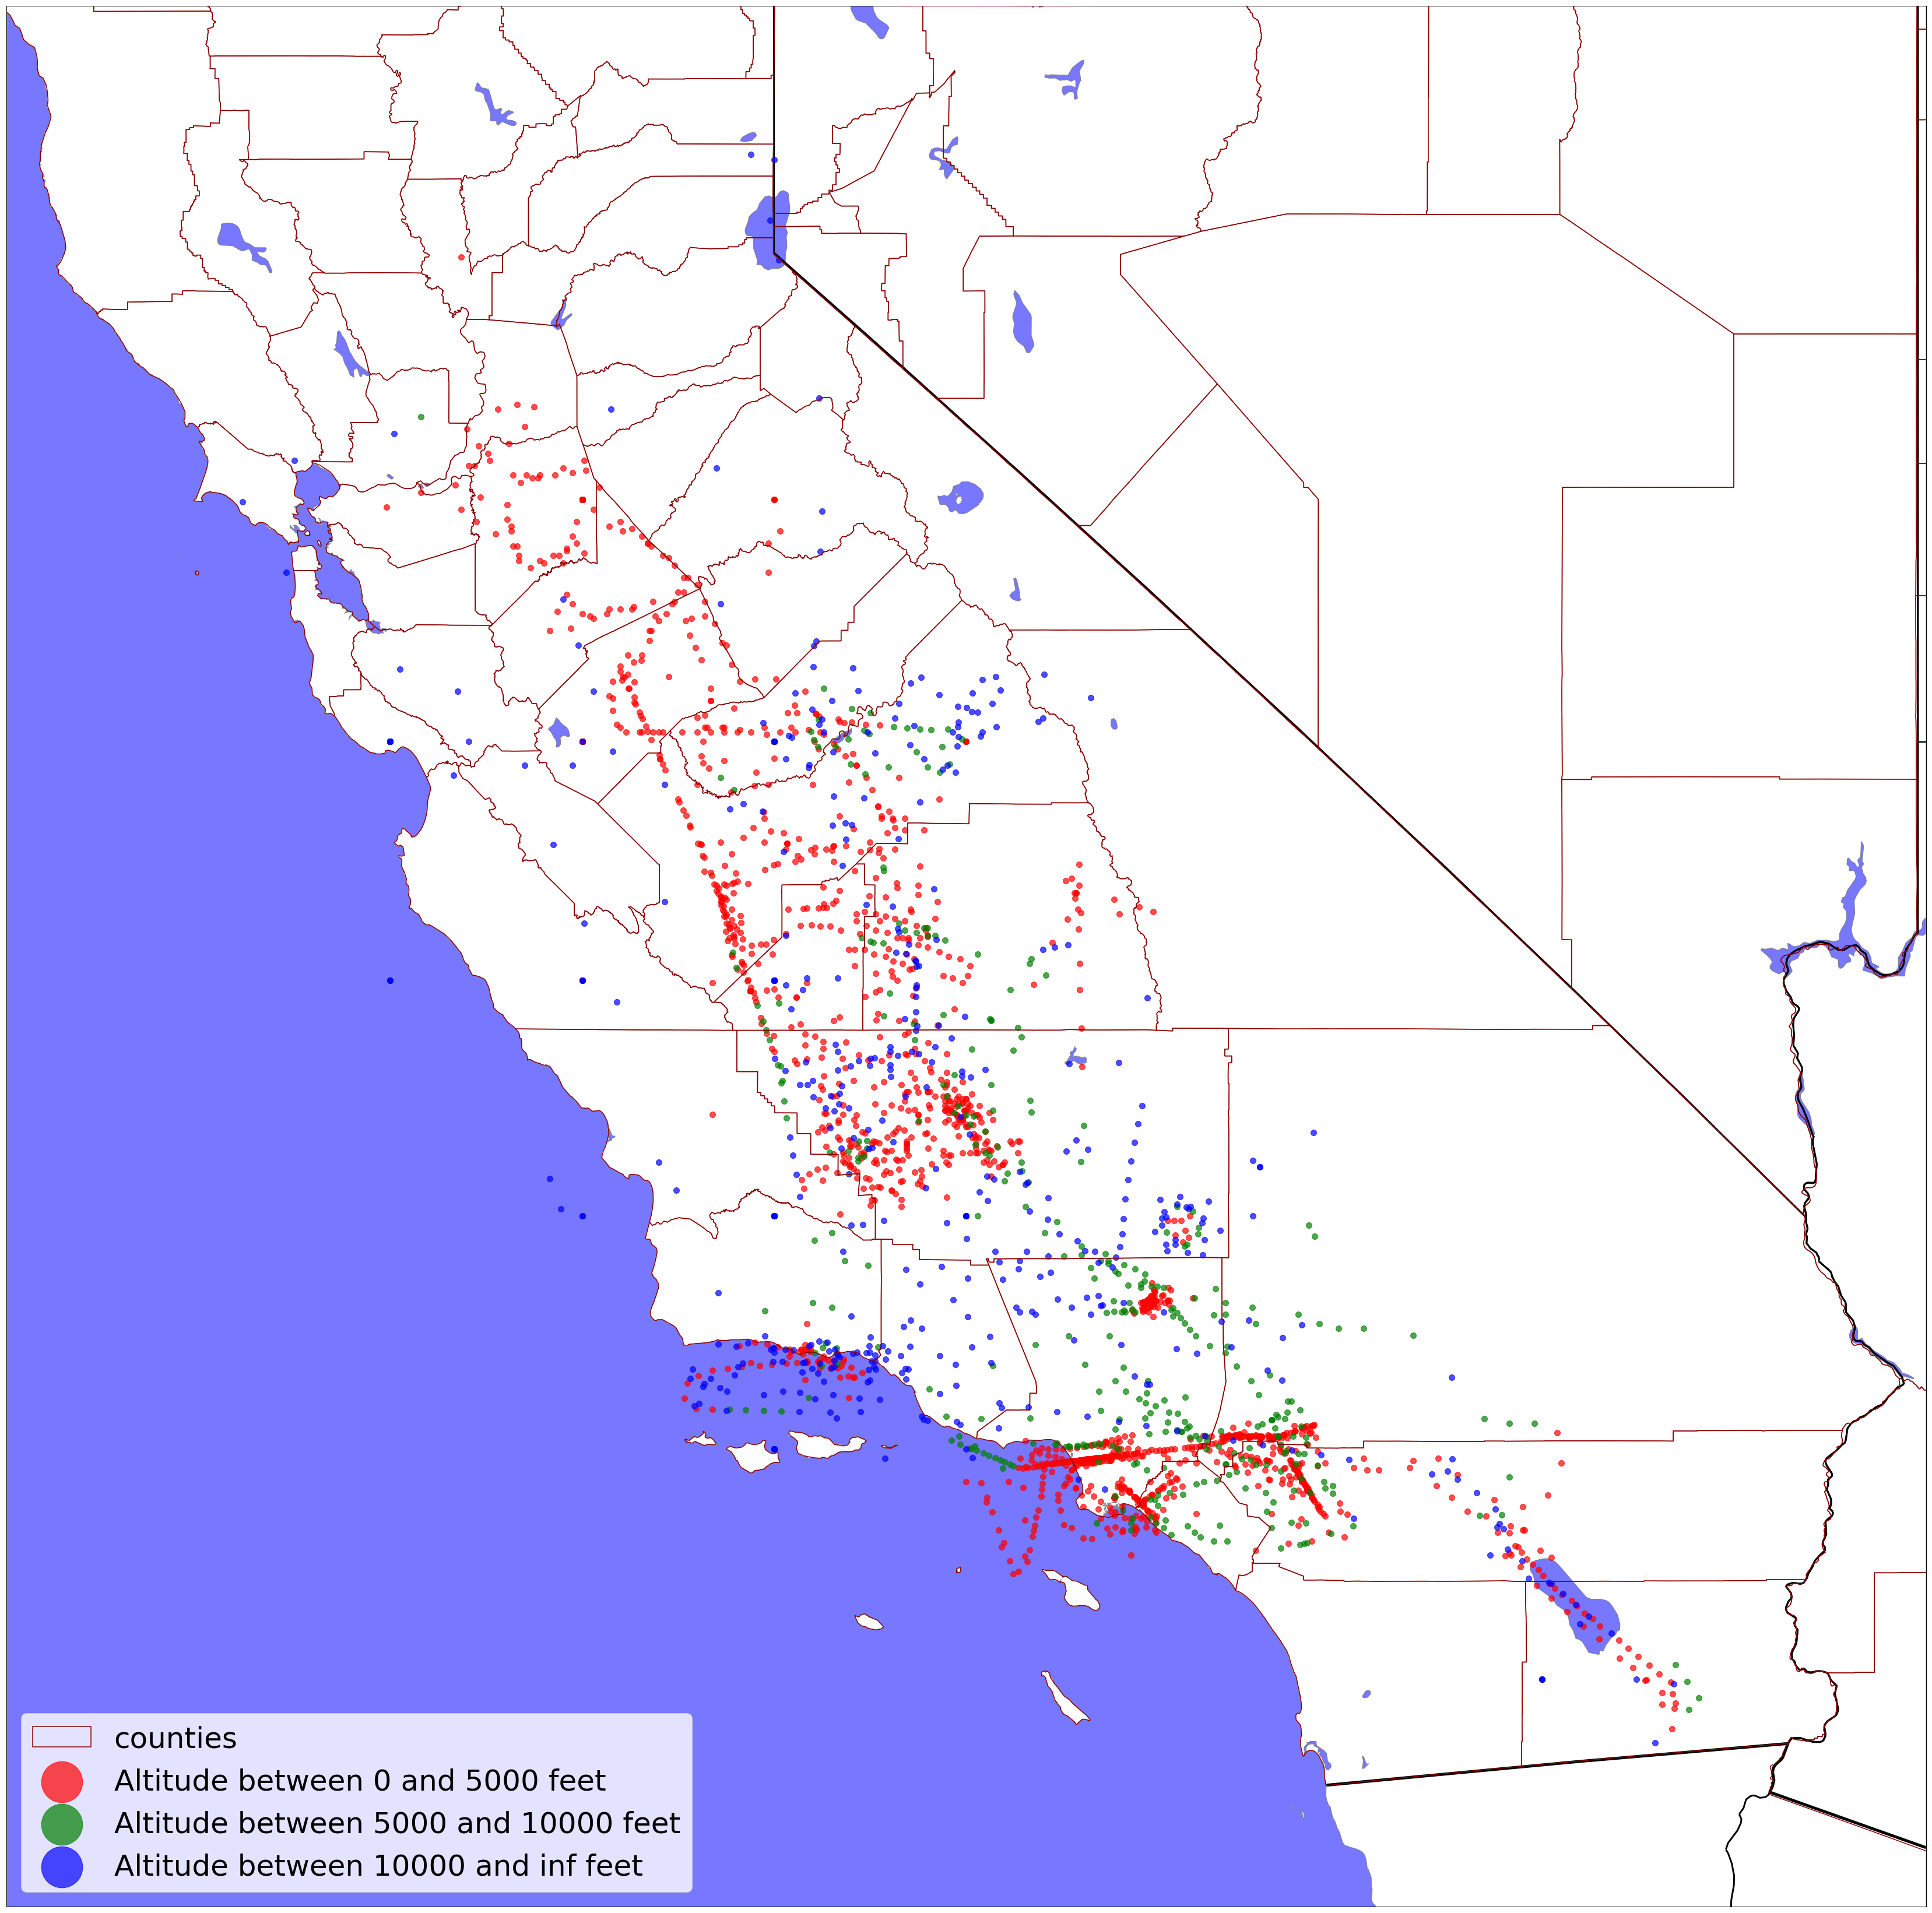

In [3]:
#Plot the collected data points based on the altitude they were collected at

colors = itertools.cycle(["r", "g", "b", 'darkorange', "grey", 'deeppink', 'y', 'darkblue', 'teal'])

plt.figure(figsize=(120,60))
map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-124, llcrnrlat=32.0,
    urcrnrlon=-114, urcrnrlat=40.0)
 
map.drawcoastlines(color='gray')
map.drawcountries(linewidth=5)
map.fillcontinents(color='white',lake_color='#7777ff')
map.drawmapboundary(fill_color='#7777ff')
map.drawstates(linewidth=3)
map.drawcounties(color='darkred', zorder=20, linewidth=1.5)

values = [0,5000,10000,math.inf]

for i, item in enumerate(values):
    if i > 0:
        map_by_category = collected_full[collected_full['AltP_feet'] >= values[i-1]]
        map_by_category = map_by_category[map_by_category['AltP_feet'] < item]
        lon = map_by_category['Longitude'].tolist()
        lat = map_by_category['Latitude'].tolist()
        x,y = map(lon, lat)
        map.scatter(x, y, color=next(colors), s=100, zorder=10, alpha=0.7, label='Altitude between '+str(values[i-1])+' and '+str(item) + ' feet')
    
lgnd = plt.legend(loc="lower left", scatterpoints=1, fontsize=50)
for i in range(1,4):
    lgnd.legendHandles[i]._sizes = [5000]
  
plt.show()

In [4]:
#check to see percentage of samples collected in each altitude bin

collected_above_10000 = collected_full[collected_full['AltP_feet'] > 10000]
collected_5000_to_10000 = collected_full[collected_full['AltP_feet'] <= 10000]
collected_5000_to_10000 = collected_5000_to_10000[collected_5000_to_10000['AltP_feet'] > 5000]
collected_under_5000 = collected_full[collected_full['AltP_feet'] <= 5000]
per_above_10000 = collected_above_10000['Can#'].count()/collected_full['Can#'].count()
per_5000_to_10000 = collected_5000_to_10000['Can#'].count()/collected_full['Can#'].count()
per_under_5000 = collected_under_5000['Can#'].count()/collected_full['Can#'].count()
is_null = (collected_full['AltP_feet'].isnull().sum() / collected_full['Can#'].count())
print(per_above_10000)
print(per_5000_to_10000)
print(per_under_5000)
print(is_null)
print(per_under_5000 + per_5000_to_10000 + per_above_10000 + is_null)

0.198169518504
0.150815758058
0.629924393156
0.0210903302825
1.0
